In [18]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.learning_curve import learning_curve
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.model_selection import validation_curve
import datetime

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import graphviz 
import timeit
import os
from IPython.display import Image

In [2]:
bank_data = pd.read_csv('bank-full.csv', delimiter = ";", header="infer")
len(bank_data)

45211

In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Change data format

In [5]:
bank_data = pd.get_dummies(bank_data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

In [6]:
bank_data.y.replace(('yes','no'), (1,0), inplace = True)


In [7]:
bank_data.y.unique()

array([0, 1])

In [8]:
bank_data.shape

(45211, 52)

In [9]:
y = bank_data['y']
del bank_data['y']

In [10]:
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [13]:

# Train - Test split# Train  
X_train, X_test, y_train, y_test = train_test_split(bank_data, y, test_size  = 0.3, random_state = 55)

print("Training dataset size: ", len(X_train))
print("Testing dataset size: ", len(X_test))
print("Training label dataset size: ", len(y_train))
print("Testing label dataset size: ", len(y_test))

Training dataset size:  31647
Testing dataset size:  13564
Training label dataset size:  31647
Testing label dataset size:  13564


### Check for hyper paramters using nearest neighbors

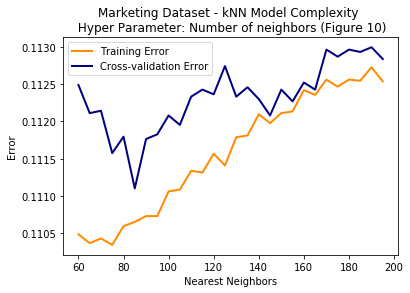

train_scores = [ 0.88951559  0.88963409  0.88957089  0.88965779  0.88940499  0.8893497
  0.8892707   0.8892707   0.88893891  0.88891521  0.88866243  0.88868613
  0.88843334  0.88859133  0.88821215  0.88818845  0.88790406  0.88802255
  0.88788826  0.88786456  0.88758017  0.88764337  0.88743798  0.88753277
  0.88743798  0.88745378  0.88727209  0.88746168]
test_scores = [ 0.88750899  0.88788817  0.88785658  0.88842534  0.88820416  0.8888993
  0.88823576  0.88817256  0.88791979  0.88804617  0.88766698  0.88757219
  0.88763539  0.88725621  0.88766701  0.88754061  0.88769862  0.88791979
  0.8875722   0.8877302   0.8874774   0.8875722   0.88703503  0.88712981
  0.887035    0.88706661  0.88700341  0.88716141]
Optimal max depth =  85  Minimum Error =   0.111100700729


In [14]:
np.random.seed(55)
neigh = KNeighborsClassifier()


param_range = np.arange(60,200,5)
train_scores, test_scores = validation_curve( neigh, X_train, y_train, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Marketing Dataset - kNN Model Complexity \n Hyper Parameter: Number of neighbors (Figure 10)")
plt.xlabel("Nearest Neighbors")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal max depth = ",  param_range[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )


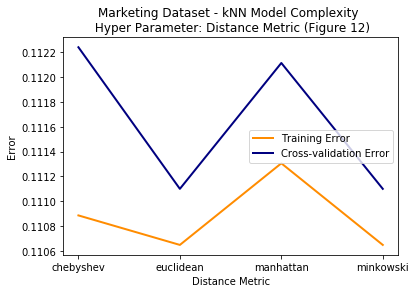

train_scores = [ 0.8893497   0.88869403  0.8893497   0.88911271]
test_scores = [ 0.8888993   0.88788819  0.8888993   0.88776178]
Optimal max depth =  minkowski  Minimum Error =   0.111100700729


In [15]:
np.random.seed(55)
neigh = KNeighborsClassifier(n_neighbors = 85)


param_range = ["minkowski", "manhattan","euclidean","chebyshev"]
train_scores, test_scores = validation_curve( neigh, X_train, y_train, param_name="metric", param_range=param_range,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Marketing Dataset - kNN Model Complexity \n Hyper Parameter: Distance Metric (Figure 12)")
plt.xlabel("Distance Metric")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal max depth = ",  param_range[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )


### Create learning curve - Sample data set size vs. Error


train_scores = [ 0.87751877  0.8834288   0.88547729  0.88838633  0.88837099  0.88934826
  0.88990463  0.8893596   0.88848804  0.8885966 ]
test_scores = [ 0.88346447  0.8855815   0.88684543  0.88608711  0.88671907  0.88640306
  0.88706663  0.88709823  0.88716145  0.88725621]
train sizes = [ 2531  5063  7595 10126 12658 15190 17721 20253 22785 25317]


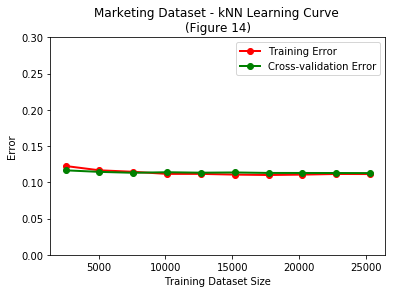

In [19]:
np.random.seed(55)
neigh = KNeighborsClassifier(n_neighbors=125, metric = 'minkowski')
st_train_time = timeit.default_timer()
neigh.fit(X_train, y_train)
end_train_time = timeit.default_timer()

title = "Marketing Dataset - kNN Learning Curve \n(Figure 14)"
ylim=(0.0, 0.3)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
#cv = StratifiedKFold(y_train, n_folds=10)
#plot_learning_curve(estimator, title, X_train, y_train, , cv=cv, n_jobs=4)



plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    neigh, X_train, y_train, cv=5, n_jobs=5, train_sizes=np.linspace(.1, 1.0, 10))



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)

plt.show()




### Predict on Testing set

In [20]:
st_pred_time = timeit.default_timer() 
y_pred = neigh.predict(X_test)
end_pred_time = timeit.default_timer() 

pred_time = end_pred_time - st_pred_time

print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))
print("AUC =", roc_auc_score(y_test, y_pred))
print("Prediction Time = ", pred_time)
print("Training Time = ", end_train_time - st_train_time)
#Create timings for Cross-validation set


Accuracy: 88.7717487467%
[[11821   161]
 [ 1362   220]]
             precision    recall  f1-score   support

          y       0.90      0.99      0.94     11982
          n       0.58      0.14      0.22      1582

avg / total       0.86      0.89      0.86     13564

AUC = 0.562813826724
Prediction Time =  6.170274612988578
Training Time =  0.4881382359890267
